<a href="https://colab.research.google.com/github/lilasu086/Individual_Coding_Project/blob/main/NeuralNetwork_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For all the questions below, you are NOT allowed to use Generative AI to create your code. Any code copied from a Generative AI tool will be considered cheating and addressed accordingly, including receiving a zero on this assignment. You are, however, allowed to use other resources, such as online blogs, GitHubs, and textbooks, to solve the problem. If you consult such resources, You are REQUIRED to include links/citations to these resources.

# **Using an MLP for Image Classification**

In this section, you will experiment with the architecture of a multi-layer perceptron and tuning its different hyper-parameters.

You will be using [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), a dataset that contains images belonging to 10 different classes. Each image is 32*32 pixels in RGB.

Reference

CIFAR-10 - Keras : https://home.mit.bme.hu/~hadhazi/Oktatas/NN18/dem3/html_demo/CIFAR-10Demo.html

Image Modeling with Keras : https://app.datacamp.com/learn/courses/image-modeling-with-keras


## **Question 1 - Baseline Model**

First, you will be creating an MLP **using Keras** that has the following specifications:





* Normalize the pixel values to the [0,1] range.
* Create an MLP with 2 hidden layers for image classification.
* Use a *linear* activation function for the hidden layers.
* Choose the appropriate activation function for the output layer.
* Use SGD (Stochastic Gradient Descent) as an optimizer.
* Use the appropriate loss function for classification.
* Apply [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/) with a patience of 3.
* Use a learning rate of 0.01
* Train for 10 epochs

Answer the following questions:
1. Report the **Accuracy** and **Execution Time**.
2. Is the model performing well? Explain the cause.


#### **Total Score: 30**





In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import time

### Fill in your code here.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Check the maximum and minimum value
print('max value of X_train: ' + str(X_train.max()))
print('max value of X_test: ' + str(X_test.max()))
print('max value of X_train: ' + str(X_train.min()))
print('max value of X_test: ' + str(X_test.min()))

max value of X_train: 255
max value of X_test: 255
max value of X_train: 0
max value of X_test: 0


In [ ]:
# Transform the data types to do the type transformation
import numpy as np

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# Check the maximum and minimum value
print('max value of X_train: ' + str(X_train.max()))
print('max value of X_test: ' + str(X_test.max()))
print('max value of X_train: ' + str(X_train.min()))
print('max value of X_test: ' + str(X_test.min()))

max value of X_train: 1.0
max value of X_test: 1.0
max value of X_train: 0.0
max value of X_test: 0.0


In [ ]:
# Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)
X_train = np.reshape(X_train,(50000, 3072))
X_test = np.reshape(X_test,(10000, 3072))

In [ ]:
model = Sequential()
model.add(Dense(128, activation='linear', input_dim=3072))
model.add(Dense(64, activation='linear'))
model.add(Dense(10, activation='softmax'))

In [ ]:
from keras.optimizers import SGD
sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
start_time = time.time()
model_base = model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[callback])
end_time = time.time()

execution_time = end_time - start_time
print("Execution time: {:.2f} seconds".format(execution_time))

Epoch 1/10
1250/1250 [==============================] - 9s 6ms/step - loss: 1.9905 - accuracy: 0.3023 - val_loss: 1.8618 - val_accuracy: 0.3490
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8204 - accuracy: 0.3590 - val_loss: 1.8666 - val_accuracy: 0.3450
Epoch 3/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.7858 - accuracy: 0.3764 - val_loss: 1.8044 - val_accuracy: 0.3696
Epoch 4/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.7668 - accuracy: 0.3864 - val_loss: 1.8764 - val_accuracy: 0.3535
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7554 - accuracy: 0.3893 - val_loss: 1.7821 - val_accuracy: 0.3841
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7443 - accuracy: 0.3957 - val_loss: 1.7805 - val_accuracy: 0.3809
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7370 - accuracy: 0.3994 - val_loss: 1.7748 - val_accuracy:

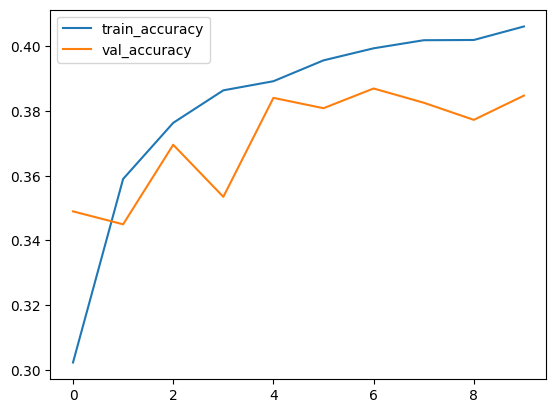

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_base.history['accuracy'])
plt.plot(model_base.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

**Q1 Answer**

For the baseline model, the model spensd 79.15 seconds in total.

Regarding the accuracy, there is a noticeable trend of continuous improvement in train accuracy. However, validation accuracy exhibits fluctuations, albeit with a gradual increase, stabilizing around 35%. Additionally, it's notable that train accuracy consistently outperforms validation accuracy throughout each epoch.

Based on my observation, the performance of this model is unsatisfactory, with an accuracy below 40%. This can be attributed to the utilization of linear activation functions, which only enable linear transformations of the input data. Consequently, the model's capacity is severely limited, allowing it to only discern linear relationships between inputs and outputs. As a consequence, the model struggles to capture intricate patterns and nonlinear relationships inherent in the data, leading to its underperformance.

## **Question 2: Experiment with Different Non-Linearities.**

Now, repeat the experiment using the same MLP above as a starting point but observing the effect of using the following  activation functions for the hidden-layers (i.e., run an experiment for each type of activation function): 1) ReLU and 2) Sigmoid.

Answer the following questions:

1. Report the **Accuracy** and **Execution Time** for each of the two experiment.
2. Reconcile your observations with your theoretical knowledge of neural networks.


#### **Total Score: 20**


### Experiment 2.1
### Activation Function - ReLU

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import time



### Fill in your code here.
model_relu = Sequential()
model_relu.add(Dense(128, activation='relu', input_dim=3072))
model_relu.add(Dense(64, activation='relu'))
model_relu.add(Flatten())
model_relu.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01)
model_relu.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
start_time = time.time()
model_relu = model_relu.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[callback])
end_time = time.time()

execution_time = end_time - start_time
print("Execution time: {:.2f} seconds".format(execution_time))

Epoch 1/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.9374 - accuracy: 0.3056 - val_loss: 1.8617 - val_accuracy: 0.3280
Epoch 2/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7537 - accuracy: 0.3786 - val_loss: 1.7221 - val_accuracy: 0.4010
Epoch 3/10
1250/1250 [==============================] - 15s 12ms/step - loss: 1.6736 - accuracy: 0.4036 - val_loss: 1.6869 - val_accuracy: 0.4075
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.6186 - accuracy: 0.4245 - val_loss: 1.6253 - val_accuracy: 0.4327
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5765 - accuracy: 0.4411 - val_loss: 1.6472 - val_accuracy: 0.4187
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5386 - accuracy: 0.4561 - val_loss: 1.5659 - val_accuracy: 0.4486
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5116 - accuracy: 0.4638 - val_loss: 1.5694 - val_acc

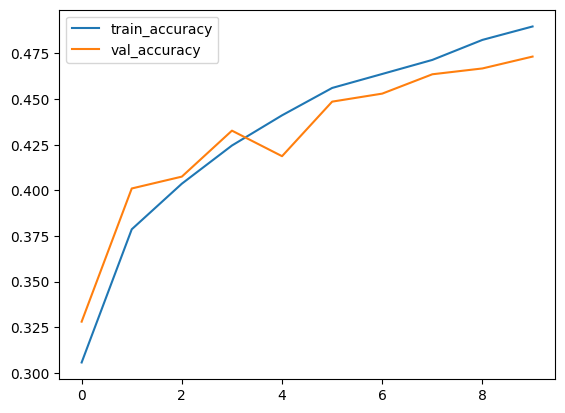

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_relu.history['accuracy'])
plt.plot(model_relu.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

### Experiment 2.2
### Activation Function - Sigmoid

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import time



### Fill in your code here.
model_sigmoid = Sequential()
model_sigmoid.add(Dense(128, activation='sigmoid', input_dim=3072))
model_sigmoid.add(Dense(64, activation='sigmoid'))
model_sigmoid.add(Flatten())
model_sigmoid.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01)
model_sigmoid.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
start_time = time.time()
model_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[callback])
end_time = time.time()

execution_time = end_time - start_time
print("Execution time: {:.2f} seconds".format(execution_time))

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 2.2582 - accuracy: 0.1813 - val_loss: 2.2012 - val_accuracy: 0.2479
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1421 - accuracy: 0.2556 - val_loss: 2.0872 - val_accuracy: 0.2615
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 2.0487 - accuracy: 0.2798 - val_loss: 2.0193 - val_accuracy: 0.2894
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9871 - accuracy: 0.2972 - val_loss: 1.9699 - val_accuracy: 0.3012
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9450 - accuracy: 0.3101 - val_loss: 1.9346 - val_accuracy: 0.3094
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9135 - accuracy: 0.3223 - val_loss: 1.9091 - val_accuracy: 0.3224
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8891 - accuracy: 0.3307 - val_loss: 1.8887 - val_accuracy:

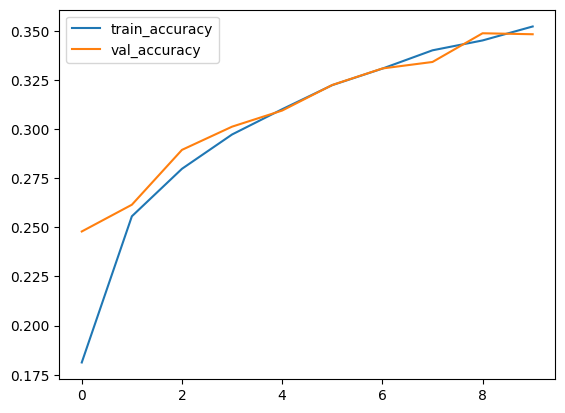

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_sigmoid.history['accuracy'])
plt.plot(model_sigmoid.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

**Q2 Answer**

For the ReLU model, the total training time is 146.32 seconds.

Regarding the accuracy, both train and validation accuracies exhibit a trend of continuous improvement. While validation accuracy shows fluctuations, it gradually increases from 32% to 47%. Notably, before the third epoch, validation accuracy surpasses train accuracy. However, after this point, there is an intersection, leading to train accuracy becoming higher.

For the Sigmoid model, the total training time is 75.36 seconds.

Regarding the accuracy, a similar trend of continuous improvement in train accuracy is observed. However, validation accuracy exhibits fewer fluctuations, gradually increasing from 25% to 35%.

Combining these observations from both charts, the Sigmoid model demonstrates lower train and validation accuracies compared to ReLU. This could be attributed to differences in gradient descent behavior. ReLU maintains a constant gradient of 1 for positive inputs, making it less prone to the vanishing gradient problem. Conversely, Sigmoid has a more complex gradient computation, particularly around its saturation regions, which may lead to unstable training.

However, despite the lower accuracy, the Sigmoid model has a shorter runtime and exhibits more similar accuracies for both train and validation datasets. This could be due to the avoidance of exploding gradients by Sigmoid's bounded output range. In contrast, ReLU's unbounded output range may lead to exploding gradients, potentially destabilizing the training process and causing significant discrepancies between train and validation accuracies.

Hence, while ReLU yields higher accuracy, Sigmoid offers faster training with more consistent performance between train and validation datasets.

## **Question 3: Experiment with Dropout Layer.**

Now, repeat the experiment using the same MLP but observing the effect of [Dropout Layers](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/) at a **rate of 0.4** (i.e., run an experiment by implementing Dropout Layer after every hidden layer).

Note:
* Use an Activation Function with the highest accuracy in Question 2.
* Use **ADAM** Optimiser to update the weights.


Answer the following questions:

1. Report the **Accuracy** and **Execution Time** for each of the two experiment.
2. How did adding the Dropout layer affect the model performance? Explain your observation based on your theoretical understanding of neural networks and drop-out.


#### **Total Score: 20**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
import time



### Fill in your code here.
model_relu_new = Sequential()
model_relu_new.add(Dense(128, activation='relu', input_dim=3072))
model.add(Dropout(0.4))
model_relu_new.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model_relu_new.add(Dense(10, activation='softmax'))

adam = Adam(learning_rate=0.01)
model_relu_new.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
start_time = time.time()
model_relu_new = model_relu_new.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[callback])
end_time = time.time()

execution_time = end_time - start_time
print("Execution time: {:.2f} seconds".format(execution_time))

Epoch 1/10
1250/1250 [==============================] - 14s 10ms/step - loss: 2.1319 - accuracy: 0.2387 - val_loss: 1.9356 - val_accuracy: 0.2935
Epoch 2/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.9086 - accuracy: 0.2946 - val_loss: 1.9413 - val_accuracy: 0.2757
Epoch 3/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8802 - accuracy: 0.3010 - val_loss: 1.8617 - val_accuracy: 0.3020
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.8722 - accuracy: 0.3012 - val_loss: 1.9683 - val_accuracy: 0.2736
Epoch 5/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.8703 - accuracy: 0.3017 - val_loss: 1.9328 - val_accuracy: 0.2535
Epoch 6/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8700 - accuracy: 0.3026 - val_loss: 1.8962 - val_accuracy: 0.2983
Execution time: 73.81 seconds


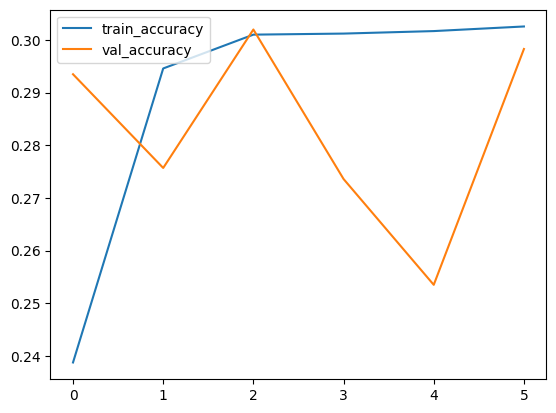

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_relu_new.history['accuracy'])
plt.plot(model_relu_new.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

**Q3 Answer**

For the ReLU model with dropout, the total training time is 73.81 seconds.

Regarding accuracy, the train accuracy shows a continuous improvement trend, reaching around 30%. However, the validation accuracy exhibits significant fluctuations around 27%. Notably, the train accuracy consistently outperforms the validation accuracy.

Comparing with the ReLU model without dropout, both train and validation accuracies decrease in the dropout model. Additionally, the dropout model triggers early stopping, terminating after only 6 epochs due to meeting the criteria for early stopping.

The potential reason for this behavior lies in the reduction of effective model capacity caused by dropout. Specifically, by randomly dropping out neuron outputs during training, dropout effectively reduces the network's capacity to capture complex patterns and relationships. As a result, the model struggles to achieve high accuracy on both training and validation datasets. This reduction in capacity is particularly impactful when the model's capacity is already limited or when the task is relatively simple, further diminishing the model's performance.

In summary, dropout reduces the effective capacity of the network, making it more challenging to capture complex patterns and relationships, especially in cases where the model's capacity is limited or the task is relatively simple. Consequently, dropout may lead to decreased accuracies and trigger early stopping during training.

# **Using an MLP for Regression**

Now, you will use an MLP to model the following The TESLA stock for 2023.

(Do NOT change this code!)


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

# Define the stock ticker symbol and the time period
## DO NOT CHANE THESE VALUES!
stock_symbol = 'TSLA'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch the historical stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

import plotly
import plotly.graph_objs as go

# Create a line plot of the stock's closing price
fig = go.Figure(data=[go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Close Price')])

# Set the layout for the plot
fig.update_layout(title=f'Stock Price of {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')

# Display the plot
fig.show()

[*********************100%%**********************]  1 of 1 completed


You will create an MLP that, given a sequence of prices for the last **sequence_length** days, it will predict the preice for the next day.

You MUST maintain the given coding structure.

You are to use `PyTorch` for this part.

###Hyper-parameters

When repeating certain the experiment, you may need to change some of these values.

In [ ]:
# Data shape and size
split_ratio = 0.8 # ratio of train data.
train_size = int(len(stock_data) * split_ratio)
sequence_length = 49 # Only change this when instructed to in a future question.

# Optimizer hyper-parameters
lr = 0.001 ### Fill in your code here.
momentum = 0.9 ### Fill in your code here.
epochs = 9000

##**Question 4: Data scaling**

* Scale the data based on the distribution of the **training** prices in the following cell.

#### **Total Score: 20**

Reference

Stock Price Prediction with PyTorch : https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632

Stock Market Prediction Using Machine Learning : https://www.analyticsvidhya.com/blog/2021/10/machine-learning-for-stock-market-prediction-with-step-by-step-implementation/

In [ ]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400


In [ ]:
stock_data = pd.DataFrame(stock_data.iloc[:, 3])
stock_data

,Close
Date,
2023-01-03,108.099998
2023-01-04,113.639999
2023-01-05,110.339996
2023-01-06,113.059998
2023-01-09,119.769997
...,...
2023-12-22,252.539993
2023-12-26,256.609985
2023-12-27,261.440002


In [ ]:
train_stock = stock_data[:train_size]
test_stock = stock_data[train_size:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Preprocess the data
scaler = MinMaxScaler()

model_scaler = scaler.fit(train_stock)

scaled_data_train = model_scaler.transform(train_stock)
scaled_data_test = model_scaler.transform(test_stock)

scaled_data_train = pd.DataFrame(scaled_data_train, columns=train_stock.columns, index=train_stock.index)
scaled_data_test = pd.DataFrame(scaled_data_test, columns=test_stock.columns, index=test_stock.index)

scaled_data = pd.concat([scaled_data_train, scaled_data_test], axis=0)

In [ ]:
scaled_data

,Close
Date,
2023-01-03,0.000000
2023-01-04,0.029907
2023-01-05,0.012092
2023-01-06,0.026776
2023-01-09,0.062999
...,...
2023-12-22,0.779745
2023-12-26,0.801717
2023-12-27,0.827791


## **Question 5: Data Preparation**

Update the following cell such that:

* From the DataFrame, create a tensor of price sequences (i.e., of the shape [*n, sequence_length+1, 1*]), where *n* is the number of sequences.   
  * For example, given indices 0 to 48, predict index 49. Then, given indices 1 to 49, predict index 50, etc.


* For each sequence, use the first *sequence_length* prices as input, and the last price as the output (i.e., the model takes the last *sequence_length* prices in to predict the next day's price).

#### **Total Score: 20**

Reference

Machine Learning for Stock Price Prediction : https://neptune.ai/blog/predicting-stock-prices-using-machine-learning

Predict Stock Prices Using RNN: Part 1 : https://lilianweng.github.io/posts/2017-07-08-stock-rnn-part-1/

Using Stock Data for Classification Problem: Action : https://albertum.medium.com/using-stock-data-for-classification-problem-action-3d427d01d8be

Stock Market Predictions with LSTM in Python : https://www.datacamp.com/tutorial/lstm-python-stock-market

In [ ]:
# Create sequences of sequence_length+1 days for training and testing.
def create_sequences(data, sequence_length):
  X = [data[i:i + sequence_length] for i in range(len(data) - sequence_length)]
  y = [data.iloc[i + sequence_length] for i in range(len(data) - sequence_length)]
  return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
X.shape

(201, 49, 1)

In [ ]:
y.shape

(201, 1)

* Update the following cell to split the data into training and testing

In [ ]:
import torch

# Split the data into training and testing sets
train_size = int(X.shape[0]* split_ratio)
X_train = torch.tensor(X[:train_size], dtype=torch.float32)
y_train = torch.tensor(y[:train_size], dtype=torch.float32)
X_test = torch.tensor(X[train_size:], dtype=torch.float32)
y_test = torch.tensor(y[train_size:], dtype=torch.float32)

## **Question 6: Design and Create the MLP**

* Update the following cell to create an MLP that has 3 hidden layers of size [*80, 30*] and that is compatible with your input and output sizes.

#### **Total Score: 20**

In [ ]:
input_size = X_train.shape[1]

In [ ]:
import torch
import torch.nn as nn

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
      super(MLP, self).__init__()
      self.input_size = input_size
      self.fc1 = nn.Linear(input_size, 80)
      self.relu1 = nn.ReLU()
      self.fc2 = nn.Linear(80, 30)
      self.relu2 = nn.ReLU()
      self.fc3 = nn.Linear(30, 12)
      self.relu3 = nn.ReLU()
      self.fc4 = nn.Linear(12, 1)


    def forward(self, x):
      x = x.view(-1, self.input_size)
      x = self.fc1(x)
      x = self.relu1(x)
      x = self.fc2(x)
      x = self.relu2(x)
      x = self.fc3(x)
      x = self.relu3(x)
      x = self.fc4(x)
      return x


# Instantiate the model
model_tesla = MLP(input_size)

* Use an SGD optimizer with effective learning rate and momentum.
* Choose the appropriate error metric.

In [ ]:
import torch.optim as optim

#define the loss function and the optimizer
criterion_training = nn.MSELoss()
criterion_testing = nn.MSELoss()
optimizer = optim.SGD(model_tesla.parameters(), lr = lr, momentum = momentum)

## **Question 7: Training**

Update the following cell to:

* Train the network for 9000 epochs
* For every 10 epochs, print both the **ACTUAL** training and **ACTUAL** test errors (i.e., the errors **BEFORE scaling**)

#### **Total Score: 20**

In [ ]:
X_original, y_original = create_sequences(stock_data, sequence_length)

In [ ]:
train_size = int(X.shape[0]* split_ratio)
X_train_original = torch.tensor(X_original[:train_size], dtype=torch.float32)
y_train_original = torch.tensor(y_original[:train_size], dtype=torch.float32)
X_test_original = torch.tensor(X_original[train_size:], dtype=torch.float32)
y_test_original = torch.tensor(y_original[train_size:], dtype=torch.float32)

In [ ]:
y_test_actual = y_test_original
y_train_actual = y_train_original

# Train the model
for epoch in range(epochs):
    model_tesla.train()

    # Update model here based on error
    optimizer.zero_grad()

    # Forward pass
    predictions_train_scaled = model_tesla(X_train)
    predictions_train_actual = torch.tensor(scaler.inverse_transform(predictions_train_scaled.detach().numpy()), dtype=torch.float32)

    # calculate the loss.
    loss = criterion_training(predictions_train_scaled, y_train)

    # Backward pass
    loss.backward()
    optimizer.step()



    model_tesla.eval()
    # Evaluate the model on the test data
    with torch.no_grad():
      # Evaluate the model here.
      predictions_test_scaled = model_tesla(X_test)
      predictions_test_actual = torch.tensor(scaler.inverse_transform(predictions_test_scaled.detach().numpy()), dtype=torch.float32)


    if epoch %10 == 0:
      print(f"Epoch {epoch}: Training Actual Error= {criterion_testing(predictions_train_actual, y_train_actual)}, Test Actual Error= {criterion_testing(predictions_test_actual, y_test_actual)}")

Epoch 0: Training Actual Error= 8023.99609375, Test Actual Error= 8754.4287109375
Epoch 10: Training Actual Error= 6524.21484375, Test Actual Error= 6778.080078125
Epoch 20: Training Actual Error= 4420.9072265625, Test Actual Error= 4296.384765625
Epoch 30: Training Actual Error= 2986.920166015625, Test Actual Error= 2590.462158203125
Epoch 40: Training Actual Error= 2166.486083984375, Test Actual Error= 1561.1646728515625
Epoch 50: Training Actual Error= 1737.216796875, Test Actual Error= 977.3123168945312
Epoch 60: Training Actual Error= 1526.5343017578125, Test Actual Error= 656.6271362304688
Epoch 70: Training Actual Error= 1427.69091796875, Test Actual Error= 482.9075927734375
Epoch 80: Training Actual Error= 1381.6859130859375, Test Actual Error= 388.6158752441406
Epoch 90: Training Actual Error= 1358.7314453125, Test Actual Error= 336.5596008300781
Epoch 100: Training Actual Error= 1345.4329833984375, Test Actual Error= 307.3340148925781
Epoch 110: Training Actual Error= 1336.49

* This code will model the same data but using [Polynomial Regression](https://en.wikipedia.org/wiki/Polynomial_regression#:~:text=In%20statistics%2C%20polynomial%20regression%20is,nth%20degree%20polynomial%20in%20x.). (Do NOT change this code)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train.numpy().reshape(-1, sequence_length))
X_test_poly = poly.transform(X_test.numpy().reshape(-1, sequence_length))
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train.numpy())
poly_predictions_test = poly_reg.predict(X_test_poly)
poly_predictions_test_actual = torch.from_numpy(scaler.inverse_transform(poly_predictions_test.reshape(-1, 1)))
poly_predictions_train = poly_reg.predict(X_train_poly)
poly_predictions_train_actual = torch.from_numpy(scaler.inverse_transform(poly_predictions_train.reshape(-1, 1)))

print(f"Training Actual Error= {criterion_testing(poly_predictions_train_actual, y_train_actual)}, Test Actual Error= {criterion_testing(poly_predictions_test_actual, y_test_actual)}")

Training Actual Error= 40.36554718017578, Test Actual Error= 52.86072540283203


The following code plots the actual training prices, the training prices as predicted by our neural network, and the prices as predicted by polynomial regression. (Do NOT change this code).

###Test results:

In [ ]:
# Plot the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=y_test_actual.flatten(), mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=predictions_test_actual.flatten(), mode='lines', name='MLP Predictions'))
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=poly_predictions_test_actual.flatten(), mode='lines', name='Polynomial Regression'))
fig.update_layout(title=f'Stock Price Predictions for {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')
fig.show()

### Training results:

In [ ]:
# Plot the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=y_train_actual.flatten(), mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=predictions_train_actual.flatten(), mode='lines', name='MLP Predictions'))
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=poly_predictions_train_actual.flatten(), mode='lines', name='Polynomial Regression'))
fig.update_layout(title=f'Stock Price Predictions for {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')
fig.show()

## **Question 8: Answer the following quesitons:**

1. Does increasing the sequence length help or hurt the models' performances? Reconcile your observation with the expected answer based on your theoretical knowledge.
2. Play with the degree of the polynomial regressions model. Does a model of *degree=1* lead to a regression equivalent to a line? Similarly, does a second degree regression lead to a prediction looking like a parabola? Explain your observations in light of your theoretical knowledge.
3. What loss function (i.e., training criterion) did you choose? Why do you think that is the most appropriate choice?
4. When comparing polynomial regression with the best-performing MLP, which one has the higher training error and which one has the higher test error? Which of the models would you say is overfitting, underfitting, or well-fitted, and why?

#### **Total Score: 80**


###8-1:

In [ ]:
# Define the stock ticker symbol and the time period
## DO NOT CHANE THESE VALUES!
stock_symbol = 'TSLA'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch the historical stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

import plotly
import plotly.graph_objs as go

# Create a line plot of the stock's closing price
fig = go.Figure(data=[go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Close Price')])

# Set the layout for the plot
fig.update_layout(title=f'Stock Price of {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')

# Display the plot
fig.show()

# Data shape and size
split_ratio = 0.8 # ratio of train data.
train_size = int(len(stock_data) * split_ratio)
sequence_length = 55 # Only change this when instructed to in a future question.

# Optimizer hyper-parameters
lr = 0.001 ### Fill in your code here.
momentum = 0.9 ### Fill in your code here.
epochs = 9000

stock_data = pd.DataFrame(stock_data.iloc[:, 3])

train_stock = stock_data[:train_size]
test_stock = stock_data[train_size:]

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Preprocess the data
scaler = MinMaxScaler()

model_scaler = scaler.fit(train_stock)

scaled_data_train = model_scaler.transform(train_stock)
scaled_data_test = model_scaler.transform(test_stock)

scaled_data_train = pd.DataFrame(scaled_data_train, columns=train_stock.columns, index=train_stock.index)
scaled_data_test = pd.DataFrame(scaled_data_test, columns=test_stock.columns, index=test_stock.index)

scaled_data = pd.concat([scaled_data_train, scaled_data_test], axis=0)

# Create sequences of sequence_length+1 days for training and testing.
def create_sequences(data, sequence_length):
  X = [data[i:i + sequence_length] for i in range(len(data) - sequence_length)]
  y = [data.iloc[i + sequence_length] for i in range(len(data) - sequence_length)]
  return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length)

import torch

# Split the data into training and testing sets
train_size = int(X.shape[0]* split_ratio)
X_train = torch.tensor(X[:train_size], dtype=torch.float32)
y_train = torch.tensor(y[:train_size], dtype=torch.float32)
X_test = torch.tensor(X[train_size:], dtype=torch.float32)
y_test = torch.tensor(y[train_size:], dtype=torch.float32)

input_size = X_train.shape[1]

import torch
import torch.nn as nn

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
      super(MLP, self).__init__()
      self.input_size = input_size
      self.fc1 = nn.Linear(input_size, 80)
      self.relu1 = nn.ReLU()
      self.fc2 = nn.Linear(80, 30)
      self.relu2 = nn.ReLU()
      self.fc3 = nn.Linear(30, 12)
      self.relu3 = nn.ReLU()
      self.fc4 = nn.Linear(12, 1)


    def forward(self, x):
      x = x.view(-1, self.input_size)
      x = self.fc1(x)
      x = self.relu1(x)
      x = self.fc2(x)
      x = self.relu2(x)
      x = self.fc3(x)
      x = self.relu3(x)
      x = self.fc4(x)
      return x


# Instantiate the model
model_tesla = MLP(input_size)

import torch.optim as optim

#define the loss function and the optimizer
criterion_training = nn.MSELoss()
criterion_testing = nn.MSELoss()
optimizer = optim.SGD(model_tesla.parameters(), lr = lr, momentum = momentum)


X_original, y_original = create_sequences(stock_data, sequence_length)


train_size = int(X.shape[0]* split_ratio)
X_train_original = torch.tensor(X_original[:train_size], dtype=torch.float32)
y_train_original = torch.tensor(y_original[:train_size], dtype=torch.float32)
X_test_original = torch.tensor(X_original[train_size:], dtype=torch.float32)
y_test_original = torch.tensor(y_original[train_size:], dtype=torch.float32)


y_test_actual = y_test_original
y_train_actual = y_train_original

# Train the model
for epoch in range(epochs):
    model_tesla.train()

    # Update model here based on error
    optimizer.zero_grad()

    # Forward pass
    predictions_train_scaled = model_tesla(X_train)
    predictions_train_actual = torch.tensor(scaler.inverse_transform(predictions_train_scaled.detach().numpy()), dtype=torch.float32)

    # calculate the loss.
    loss = criterion_training(predictions_train_scaled, y_train)

    # Backward pass
    loss.backward()
    optimizer.step()



    model_tesla.eval()
    # Evaluate the model on the test data
    with torch.no_grad():
      # Evaluate the model here.
      predictions_test_scaled = model_tesla(X_test)
      predictions_test_actual = torch.tensor(scaler.inverse_transform(predictions_test_scaled.detach().numpy()), dtype=torch.float32)


    if epoch %10 == 0:
      print(f"Epoch {epoch}: Training Actual Error= {criterion_testing(predictions_train_actual, y_train_actual)}, Test Actual Error= {criterion_testing(predictions_test_actual, y_test_actual)}")

[*********************100%%**********************]  1 of 1 completed


Epoch 0: Training Actual Error= 30613.138671875, Test Actual Error= 33182.7578125
Epoch 10: Training Actual Error= 25353.599609375, Test Actual Error= 26893.94921875
Epoch 20: Training Actual Error= 18000.337890625, Test Actual Error= 19001.765625
Epoch 30: Training Actual Error= 11905.9716796875, Test Actual Error= 12506.9404296875
Epoch 40: Training Actual Error= 7697.92529296875, Test Actual Error= 7961.6298828125
Epoch 50: Training Actual Error= 5035.4541015625, Test Actual Error= 5005.1484375
Epoch 60: Training Actual Error= 3435.487060546875, Test Actual Error= 3153.78662109375
Epoch 70: Training Actual Error= 2507.432861328125, Test Actual Error= 2018.682861328125
Epoch 80: Training Actual Error= 1983.5997314453125, Test Actual Error= 1326.9010009765625
Epoch 90: Training Actual Error= 1693.78564453125, Test Actual Error= 904.072021484375
Epoch 100: Training Actual Error= 1535.403564453125, Test Actual Error= 646.3798828125
Epoch 110: Training Actual Error= 1450.2796630859375, T

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train.numpy().reshape(-1, sequence_length))
X_test_poly = poly.transform(X_test.numpy().reshape(-1, sequence_length))
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train.numpy())
poly_predictions_test = poly_reg.predict(X_test_poly)
poly_predictions_test_actual = torch.from_numpy(scaler.inverse_transform(poly_predictions_test.reshape(-1, 1)))
poly_predictions_train = poly_reg.predict(X_train_poly)
poly_predictions_train_actual = torch.from_numpy(scaler.inverse_transform(poly_predictions_train.reshape(-1, 1)))

print(f"Training Actual Error= {criterion_testing(poly_predictions_train_actual, y_train_actual)}, Test Actual Error= {criterion_testing(poly_predictions_test_actual, y_test_actual)}")
print()

# Plot the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=y_test_actual.flatten(), mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=predictions_test_actual.flatten(), mode='lines', name='MLP Predictions'))
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=poly_predictions_test_actual.flatten(), mode='lines', name='Polynomial Regression'))
fig.update_layout(title=f'Stock Price Predictions for {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')
fig.show()
print()

# Plot the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=y_train_actual.flatten(), mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=predictions_train_actual.flatten(), mode='lines', name='MLP Predictions'))
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=poly_predictions_train_actual.flatten(), mode='lines', name='Polynomial Regression'))
fig.update_layout(title=f'Stock Price Predictions for {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')
fig.show()
print()

Training Actual Error= 38.08008575439453, Test Actual Error= 63.267822265625



**Q8-1 Answers**

Increasing the sequence length is likely to adversely affect the model's performance. This is evident from the decrease in the training error from 82 to 80, but a simultaneous increase in the testing error from 56 to 59. This suggests a case of overfitting, where the model becomes excessively tuned to the noise or random variations in the training data rather than the underlying patterns or relationships. Consequently, the model may perform well on the training data but struggle to generalize to new, unseen data. Thus, increasing the sequence length would likely degrade the model's performance due to overfitting.

###8-2:

In [ ]:
# Define the stock ticker symbol and the time period
## DO NOT CHANE THESE VALUES!
stock_symbol = 'TSLA'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch the historical stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

import plotly
import plotly.graph_objs as go

# Create a line plot of the stock's closing price
fig = go.Figure(data=[go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Close Price')])

# Set the layout for the plot
fig.update_layout(title=f'Stock Price of {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')

# Display the plot
fig.show()

# Data shape and size
split_ratio = 0.8 # ratio of train data.
train_size = int(len(stock_data) * split_ratio)
sequence_length = 49 # Only change this when instructed to in a future question.

# Optimizer hyper-parameters
lr = 0.001 ### Fill in your code here.
momentum = 0.9 ### Fill in your code here.
epochs = 9000

stock_data = pd.DataFrame(stock_data.iloc[:, 3])

train_stock = stock_data[:train_size]
test_stock = stock_data[train_size:]

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Preprocess the data
scaler = MinMaxScaler()

model_scaler = scaler.fit(train_stock)

scaled_data_train = model_scaler.transform(train_stock)
scaled_data_test = model_scaler.transform(test_stock)

scaled_data_train = pd.DataFrame(scaled_data_train, columns=train_stock.columns, index=train_stock.index)
scaled_data_test = pd.DataFrame(scaled_data_test, columns=test_stock.columns, index=test_stock.index)

scaled_data = pd.concat([scaled_data_train, scaled_data_test], axis=0)

# Create sequences of sequence_length+1 days for training and testing.
def create_sequences(data, sequence_length):
  X = [data[i:i + sequence_length] for i in range(len(data) - sequence_length)]
  y = [data.iloc[i + sequence_length] for i in range(len(data) - sequence_length)]
  return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length)

import torch

# Split the data into training and testing sets
train_size = int(X.shape[0]* split_ratio)
X_train = torch.tensor(X[:train_size], dtype=torch.float32)
y_train = torch.tensor(y[:train_size], dtype=torch.float32)
X_test = torch.tensor(X[train_size:], dtype=torch.float32)
y_test = torch.tensor(y[train_size:], dtype=torch.float32)

input_size = X_train.shape[1]

import torch
import torch.nn as nn

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
      super(MLP, self).__init__()
      self.input_size = input_size
      self.fc1 = nn.Linear(input_size, 80)
      self.relu1 = nn.ReLU()
      self.fc2 = nn.Linear(80, 30)
      self.relu2 = nn.ReLU()
      self.fc3 = nn.Linear(30, 12)
      self.relu3 = nn.ReLU()
      self.fc4 = nn.Linear(12, 1)


    def forward(self, x):
      x = x.view(-1, self.input_size)
      x = self.fc1(x)
      x = self.relu1(x)
      x = self.fc2(x)
      x = self.relu2(x)
      x = self.fc3(x)
      x = self.relu3(x)
      x = self.fc4(x)
      return x


# Instantiate the model
model_tesla = MLP(input_size)

import torch.optim as optim

#define the loss function and the optimizer
criterion_training = nn.MSELoss()
criterion_testing = nn.MSELoss()
optimizer = optim.SGD(model_tesla.parameters(), lr = lr, momentum = momentum)


X_original, y_original = create_sequences(stock_data, sequence_length)


train_size = int(X.shape[0]* split_ratio)
X_train_original = torch.tensor(X_original[:train_size], dtype=torch.float32)
y_train_original = torch.tensor(y_original[:train_size], dtype=torch.float32)
X_test_original = torch.tensor(X_original[train_size:], dtype=torch.float32)
y_test_original = torch.tensor(y_original[train_size:], dtype=torch.float32)


y_test_actual = y_test_original
y_train_actual = y_train_original

# Train the model
for epoch in range(epochs):
    model_tesla.train()

    # Update model here based on error
    optimizer.zero_grad()

    # Forward pass
    predictions_train_scaled = model_tesla(X_train)
    predictions_train_actual = torch.tensor(scaler.inverse_transform(predictions_train_scaled.detach().numpy()), dtype=torch.float32)

    # calculate the loss.
    loss = criterion_training(predictions_train_scaled, y_train)

    # Backward pass
    loss.backward()
    optimizer.step()



    model_tesla.eval()
    # Evaluate the model on the test data
    with torch.no_grad():
      # Evaluate the model here.
      predictions_test_scaled = model_tesla(X_test)
      predictions_test_actual = torch.tensor(scaler.inverse_transform(predictions_test_scaled.detach().numpy()), dtype=torch.float32)


    if epoch %10 == 0:
      print(f"Epoch {epoch}: Training Actual Error= {criterion_testing(predictions_train_actual, y_train_actual)}, Test Actual Error= {criterion_testing(predictions_test_actual, y_test_actual)}")


[*********************100%%**********************]  1 of 1 completed


Epoch 0: Training Actual Error= 22369.068359375, Test Actual Error= 24518.8515625
Epoch 10: Training Actual Error= 17771.06640625, Test Actual Error= 18791.490234375
Epoch 20: Training Actual Error= 11663.111328125, Test Actual Error= 12123.974609375
Epoch 30: Training Actual Error= 7027.2001953125, Test Actual Error= 7054.82470703125
Epoch 40: Training Actual Error= 4033.580810546875, Test Actual Error= 3725.054931640625
Epoch 50: Training Actual Error= 2366.70263671875, Test Actual Error= 1816.647705078125
Epoch 60: Training Actual Error= 1572.685791015625, Test Actual Error= 852.5289916992188
Epoch 70: Training Actual Error= 1260.3604736328125, Test Actual Error= 421.7918701171875
Epoch 80: Training Actual Error= 1172.344970703125, Test Actual Error= 265.8015441894531
Epoch 90: Training Actual Error= 1155.51220703125, Test Actual Error= 218.44345092773438
Epoch 100: Training Actual Error= 1150.0703125, Test Actual Error= 206.17489624023438
Epoch 110: Training Actual Error= 1143.3621

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train.numpy().reshape(-1, sequence_length))
X_test_poly = poly.transform(X_test.numpy().reshape(-1, sequence_length))
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train.numpy())
poly_predictions_test = poly_reg.predict(X_test_poly)
poly_predictions_test_actual = torch.from_numpy(scaler.inverse_transform(poly_predictions_test.reshape(-1, 1)))
poly_predictions_train = poly_reg.predict(X_train_poly)
poly_predictions_train_actual = torch.from_numpy(scaler.inverse_transform(poly_predictions_train.reshape(-1, 1)))

print(f"Training Actual Error= {criterion_testing(poly_predictions_train_actual, y_train_actual)}, Test Actual Error= {criterion_testing(poly_predictions_test_actual, y_test_actual)}")
print()

# Plot the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=y_test_actual.flatten(), mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=predictions_test_actual.flatten(), mode='lines', name='MLP Predictions'))
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=poly_predictions_test_actual.flatten(), mode='lines', name='Polynomial Regression'))
fig.update_layout(title=f'Stock Price Predictions for {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')
fig.show()
print()

# Plot the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=y_train_actual.flatten(), mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=predictions_train_actual.flatten(), mode='lines', name='MLP Predictions'))
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=poly_predictions_train_actual.flatten(), mode='lines', name='Polynomial Regression'))
fig.update_layout(title=f'Stock Price Predictions for {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')
fig.show()
print()

Training Actual Error= 40.36554718017578, Test Actual Error= 52.86072540283203



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.numpy().reshape(-1, sequence_length))
X_test_poly = poly.transform(X_test.numpy().reshape(-1, sequence_length))
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train.numpy())
poly_predictions_test = poly_reg.predict(X_test_poly)
poly_predictions_test_actual = torch.from_numpy(scaler.inverse_transform(poly_predictions_test.reshape(-1, 1)))
poly_predictions_train = poly_reg.predict(X_train_poly)
poly_predictions_train_actual = torch.from_numpy(scaler.inverse_transform(poly_predictions_train.reshape(-1, 1)))

print(f"Training Actual Error= {criterion_testing(poly_predictions_train_actual, y_train_actual)}, Test Actual Error= {criterion_testing(poly_predictions_test_actual, y_test_actual)}")
print()

# Plot the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=y_test_actual.flatten(), mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=predictions_test_actual.flatten(), mode='lines', name='MLP Predictions'))
fig.add_trace(go.Scatter(x=stock_data.index[train_size + sequence_length:], y=poly_predictions_test_actual.flatten(), mode='lines', name='Polynomial Regression'))
fig.update_layout(title=f'Stock Price Predictions for {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')
fig.show()
print()

# Plot the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=y_train_actual.flatten(), mode='lines', name='Actual Price'))
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=predictions_train_actual.flatten(), mode='lines', name='MLP Predictions'))
fig.add_trace(go.Scatter(x=stock_data.index[sequence_length:train_size + sequence_length], y=poly_predictions_train_actual.flatten(), mode='lines', name='Polynomial Regression'))
fig.update_layout(title=f'Stock Price Predictions for {stock_symbol}', xaxis_title='Date', yaxis_title='Price (USD)', template='plotly_dark')
fig.show()
print()

Training Actual Error= 2.9208763407950755e-06, Test Actual Error= 350.8028259277344



**Q8-2 Answers**

In the chart illustrating the model with a degree of 1, while it is not perfectly linear, it appears more linear compared to the model with a degree of 2. Specifically, the model with a degree of 2 presents a smoother curve, albeit not precisely parabolic. This is due to the quadratic nature of the degree 2 polynomial, which imparts a parabolic shape to the line. Consequently, the model with a degree of 2 demonstrates more pronounced parabolic curvature and overall smoothing in contrast to the model with a degree of 1.

###8-3:

**Q8-3 Answers**

When calculating the loss, I opted to use the MSE loss function. In regression problems, utilizing the Mean Squared Error (MSE) is a widely adopted practice. MSE computes the average squared difference between the actual and predicted values. The advantages of employing MSE in regression problems lie in its ability to emphasize outliers and its convex nature.

Specifically, squaring the errors in MSE disproportionately penalizes larger errors compared to smaller ones. This characteristic is particularly beneficial when confronted with outliers or instances with substantial prediction errors. By assigning greater penalties to outliers, MSE encourages the model to prioritize minimizing the impact of these instances on the overall loss. Consequently, this approach may lead to a more resilient and robust model performance.

Additionally, the convexity of the MSE loss function is noteworthy. Convexity implies that the function possesses a single global minimum. This property ensures that optimization algorithms converge to a unique solution, facilitating more efficient model training. Consequently, the convex nature of MSE simplifies the training process, streamlining the convergence of optimization algorithms toward an optimal solution.

###8-4:

**Q8-4 Answers**

Upon comparing polynomial regression with a degree of 1 to the best-performing MLP with a sequence length of 49, the polynomial regression exhibits superior performance. This is attributed to the similarity between the trend of polynomial regression and the actual price data.

Furthermore, in terms of error metrics, the polynomial regression demonstrates lower errors compared to the MLP. Specifically, for the polynomial regression, the training actual error is 40.36554718017578, and the test actual error is 52.86072540283203. In contrast, for the best-performing MLP, the training actual error is 82.07243347167969, and the test actual error is 56.59347152709961. Consequently, polynomial regression boasts lower errors both in training and testing phases.

Overall, considering both the trend shape and the error metrics, it can be concluded that polynomial regression with a degree of 1 is better-fitted due to its lower training and test errors. In contrast, the best-performing MLP with a sequence length of 49 is underfitting because both training and test errors are high.